In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
import keras
from keras import layers

gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64':
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.OneHot_gen import *
from Utils.TFIDF_gen import *
from Utils.word2vec_gen import *
from Utils.vector_gen import *

from Models.RNN_paper_prototype import *


2024-03-09 00:16:41.188642: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 00:16:41.188685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 00:16:41.189711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-09 00:16:41.195156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 00:16:41.857045: W tensorflow/compiler/tf2

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-03-09 00:16:42.502356: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-09 00:16:42.538839: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-09 00:16:42.539028: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
original_df = dataframe_init(gpu_token)
word2vec_init(original_df,gpu_token)
vectors = vec_split(original_df)

2024-03-09 00:16:48.089339: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-09 00:16:48.089588: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-09 00:16:48.089733: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
# tensors = tensor_gen(vectors)
vectors[0]

,Lines,Label,Encoded Lines
0,"<start> u8 codeFlag = 1 , i ;...","[1, 0]","<start> u8 codeFlag = 1 , i ;..."
1,<start> <end>,"[1, 0]",<start> <end>
2,<start> <end>,"[1, 0]",<start> <end>
3,<start> <end>,"[1, 0]",<start> <end>
4,"<start> int x , y , offsetx = 0 ; <end>","[1, 0]","<start> int x , y , offsetx = 0 ; <end>"
...,...,...,...
4158,<start> buzzerDetection ( ) ; <end>,"[1, 0]",<start> buzzerDetection ( ) ; <end>
4159,<start> uint16_t funds = CSH_GetUserFunds ...,"[1, 0]",<start> uint16_t funds = CSH_GetUserFunds ...
4160,"<start> fscanf ( f , ""%d"" , &n ) ; <end>","[1, 0]","<start> fscanf ( f , ""%d"" , &n ) ; <end>"
4161,<start> for ( i = 0 ; i < MAX_ADDRESS ; i +...,"[1, 0]",<start> for ( i = 0 ; i < MAX_ADDRESS ; i +...


In [5]:
model = model_init(vectors[0]['Encoded Lines'][0].shape[0])
model.summary()


2024-03-08 23:51:27.069357: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-08 23:51:27.069588: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-08 23:51:27.069727: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 218, 1024)         1050624   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 218, 1024)         2098176   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1024)              2098176   
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [7]:
with tf.device('GPU'):
    history = model.fit(tensors[0], tensors[2], epochs=20)

Epoch 1/20
131/131 [==============================] - 39s 278ms/step - loss: 0.0125 - accuracy: 0.9741
Epoch 2/20
131/131 [==============================] - 36s 278ms/step - loss: 0.0104 - accuracy: 0.9813
Epoch 3/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0100 - accuracy: 0.9813
Epoch 4/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0102 - accuracy: 0.9813
Epoch 5/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0102 - accuracy: 0.9813
Epoch 6/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0101 - accuracy: 0.9813
Epoch 7/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0101 - accuracy: 0.9813
Epoch 8/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0097 - accuracy: 0.9813
Epoch 9/20
131/131 [==============================] - 37s 279ms/step - loss: 0.0102 - accuracy: 0.9813
Epoch 10/20
131/131 [==============================] - 37s 279ms/step - l

In [17]:
# y_pred = model.predict(tensors[1])
vectors[1]['Encoded Lines']

(1042,)

In [10]:
list(y_pred)

[array([0.93087053, 0.06912945], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.9152953 , 0.08470476], dtype=float32),
 array([0.8456942 , 0.15430586], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.9152953 , 0.08470476], dtype=float32),
 array([0.84569407, 0.15430588], dtype=float32),
 array([0.9152953 , 0.08470476], dtype=float32),
 array([0.87219113, 0.12780884], dtype=float32),
 array([0.87219113, 0.12780885], dtype=float32),
 array([0.8456942 , 0.15430585], dtype=float32),
 array([0.9152953 , 0.08470476], dtype=float32),
 array([0.93087053, 0.06912945], dtype=float32),
 array([0.87219113, 0.12780888], dtype=float32),
 array([0.92298526, 

In [10]:
!git pull

1531.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 7 (delta 5), reused 7 (delta 5), pack-reused 0
Unpacking objects: 100% (7/7), 3.02 KiB | 515.00 KiB/s, done.
From https://github.com/sakshmenon/Faulthunter-RNN-approach
   44c0b4d..cecf807  dev        -> origin/dev
Updating 44c0b4d..cecf807
Fast-forward
 Scripts/tester.ipynb         | 12895 +----------------------------------------
 Scripts/vec_playground.ipynb |    12 -
 Utils/word2vec_gen.py        |     2 +
 3 files changed, 127 insertions(+), 12782 deletions(-)


In [20]:
model.evaluate(tensors[3],y_pred)

ValueError: in user code:

    File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ucdasec/tensorflow/tensorvenv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 218, 1), found shape=(None, 2)


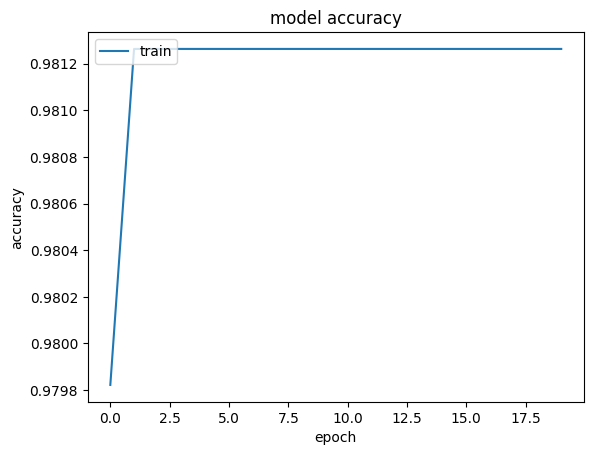

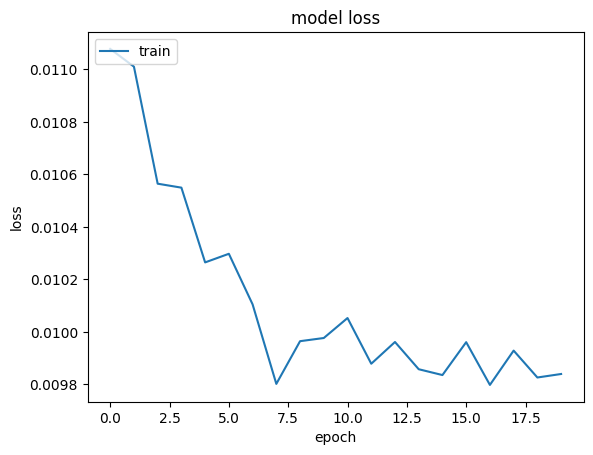

In [25]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()